In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from dataset import ImageDataset

def pca_compress(dt,idx,n_components=20):
    """
        input:img dataset, numpy array
        output:img dataset, numpy array
    """
    
    #flatten the dataset
    data=np.array([i.flatten() for i in dt])
    
    #standardize data
    scaler = StandardScaler()
    datas = scaler.fit_transform(data)
    
    
    #apply pca on rgb channel seperately
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(datas)
    data_pca=pca.inverse_transform(transformed_data)
    
    
    #resize image
    data_reverse=scaler.inverse_transform(data_pca)
    img=data_reverse[idx]
    return Image.fromarray(img.reshape((512, 768, 3)).astype(np.uint8))

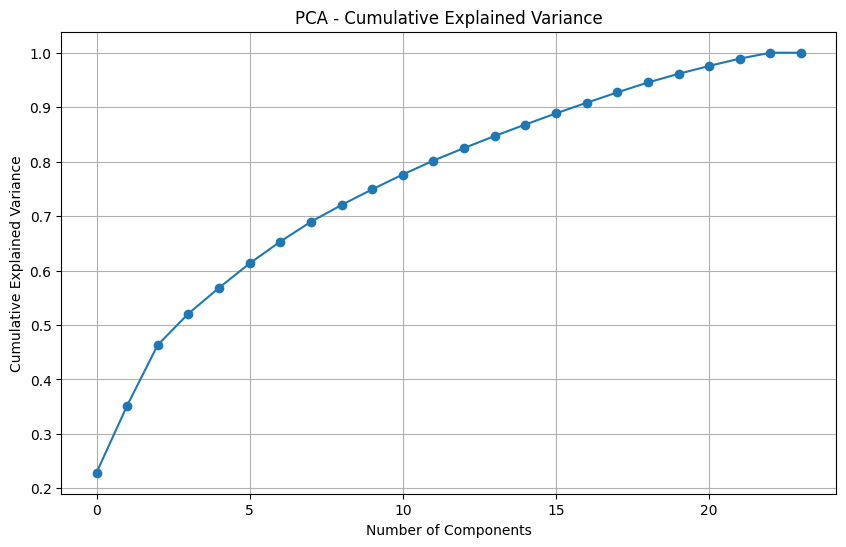

In [6]:
dt=ImageDataset()
data=np.array([i.flatten() for i in dt])
scaler = StandardScaler()
datas = scaler.fit_transform(data)
pca = PCA()
pca.fit(datas)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Finding the number of components for 80% of explained variance
n_components_80 = np.argmax(cumulative_explained_variance >= 0.8) + 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.savefig('variance.png')
plt.show()

In [ ]:
dt=ImageDataset()
fig, axs = plt.subplots(nrows=2, ncols=2)
ks=[5,10,15,20]
imgs=[pca_compress(dt,0,k) for k in ks]

axs[0, 0].imshow(imgs[0])
axs[0, 1].imshow(imgs[1])
axs[1, 0].imshow(imgs[2])
axs[1, 1].imshow(imgs[3]) 

axs[0, 0].set_title('Dimension 5')
axs[0, 0].axis('off')

axs[0, 1].set_title('Dimension 10')
axs[0, 1].axis('off')

axs[1, 0].set_title('Dimension 15')
axs[1, 0].axis('off')

axs[1, 1].set_title('Dimension 20')
axs[1, 1].axis('off')

plt.savefig('pca.png')

plt.show()

In [2]:
from numpy.linalg import svd
def svd_compress(dt,idx,k=30):
    #get image
    img=dt[idx]

    #extract rgb channels
    datar=img[:,:,0]
    datag=img[:,:,1]
    datab=img[:,:,2]
    
    #apply svd on rgb channel seperately
    def compress_channel(channel, k):
        U, s, Vt = svd(channel, full_matrices=False)
        compressed = np.dot(U[:, :k], np.dot(np.diag(s[:k]), Vt[:k, :]))
        return compressed
    
    # Compress each channel
    datar=compress_channel(datar, k)
    datag=compress_channel(datag, k)
    datab=compress_channel(datab, k)
    
    #combine rgb channels
    compressed_image = np.stack((datar, datag, datab), axis=2)
    compressed_image = np.clip(compressed_image, 0, 255).astype('uint8')
    
    #save image
    pil_image = Image.fromarray(compressed_image, 'RGB')
    return pil_image
    

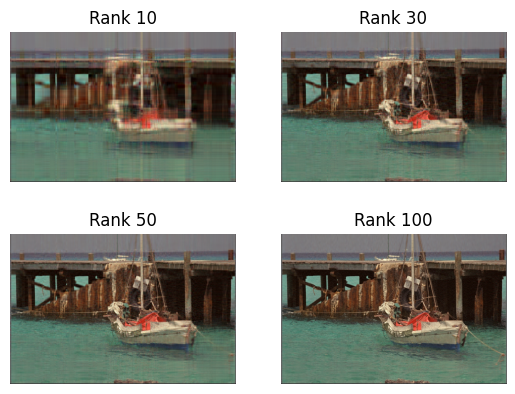

In [3]:
dt=ImageDataset()
fig, axs = plt.subplots(nrows=2, ncols=2)
ks=[10,30,50,100]
imgs=[svd_compress(dt,0,k) for k in ks]
axs[0, 0].imshow(imgs[0])
axs[0, 1].imshow(imgs[1])
axs[1, 0].imshow(imgs[2])
axs[1, 1].imshow(imgs[3]) 

axs[0, 0].set_title('Rank 10')
axs[0, 0].axis('off')

axs[0, 1].set_title('Rank 30')
axs[0, 1].axis('off')

axs[1, 0].set_title('Rank 50')
axs[1, 0].axis('off')

axs[1, 1].set_title('Rank 100')
axs[1, 1].axis('off')

plt.savefig('svd.png')

plt.show()